In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

The first thing we do is to import the respective datasets. 
Then we merge them together on its key and make an initial display

In [2]:
df_estructura = pd.read_csv("Input1_clientes_estructura.csv",sep=";")
df_ventas = pd.read_csv("Input2_clientes_venta.csv",sep=";")
#merge the tables by its key
df = df_ventas.merge(df_estructura,on="Cliente")
#display(df)

In [3]:
#print(df.isna().sum())#THERE IS NOT MISSING VALUES

In [4]:
def cat_to_int(df,col_name,int1,int2):
    for i in df[col_name]:
        if len(i) == int1:
            df[col_name] = df[col_name].replace(i,i[-1])
        elif len(i) == int2:
            df[col_name] = df[col_name].replace(i,i[-2:])
    df[col_name] = df[col_name].astype("int64")
    return df[col_name]

In [5]:
df["SegmentoPrecio2"] = cat_to_int(df,"SegmentoPrecio2",16,17)
assert df["SegmentoPrecio2"].dtype == "int64"
df["Marca2"] = cat_to_int(df,"Marca2",7,8)
assert df["Marca2"].dtype == "int64"
df["Cupo2"] = cat_to_int(df,"Cupo2",6,7)
assert df["Cupo2"].dtype == "int64"
df["CapacidadEnvase2"] = cat_to_int(df,"CapacidadEnvase2",17,18)
assert df["CapacidadEnvase2"].dtype == "int64"
df["Gerencia2"] = cat_to_int(df,"Gerencia2",10,11)
assert df["Gerencia2"].dtype == "int64"
df["SubCanal2"] = cat_to_int(df,"SubCanal2",10,11)
assert df["SubCanal2"].dtype == "int64"
df["Categoria"] = cat_to_int(df,"Categoria",11,12)
assert df["Categoria"].dtype == "int64"

In [6]:
df_filt = df.query("Marca2 == 20 or Marca2 == 16 or Marca2 == 9 or Marca2 == 38 or Marca2 == 39")
df_filt_2 = df_filt.query("Cupo2 == 3 or Cupo2 == 2 or Cupo2 == 3")
df_filt_3 = df_filt_2.query("CapacidadEnvase2 == 9 or CapacidadEnvase2 == 10 or CapacidadEnvase2 == 12")
display(df_filt_3)

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
41,2019,9,10,3,9,3,12,0.037410,-27.511153,595.371853,Regional 1,3,1,2,1
50,2019,10,10,3,9,3,12,0.018705,0.000000,312.594302,Regional 1,3,1,2,1
75,2020,1,10,3,9,3,12,0.018705,0.000000,312.594302,Regional 1,3,1,2,1
78,2020,2,10,3,9,3,12,0.187048,-362.140404,2775.419943,Regional 1,3,1,2,1
94,2019,12,10,3,9,3,12,0.018705,-41.058746,289.278489,Regional 1,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,3,39,2,10,0.039122,0.000000,544.150314,Regional 1,8,3,2,0
1406112,2020,7,20580,1,38,2,10,0.000000,0.000000,0.000000,Regional 1,10,5,6,0
1406113,2020,7,20580,3,39,2,10,0.058683,0.000000,759.218996,Regional 1,10,5,6,0
1406114,2020,9,20580,1,38,2,10,0.000000,0.000000,0.000000,Regional 1,10,5,6,0


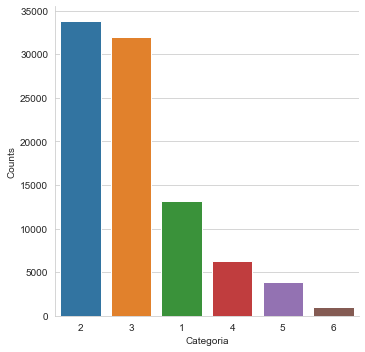

In [7]:
sns.set_style("whitegrid")
sns.catplot(x="Categoria",data=df_filt_3,kind="count",order = df_filt["Categoria"].value_counts().index)
plt.xlabel("Categoria")
plt.ylabel("Counts")
plt.show()

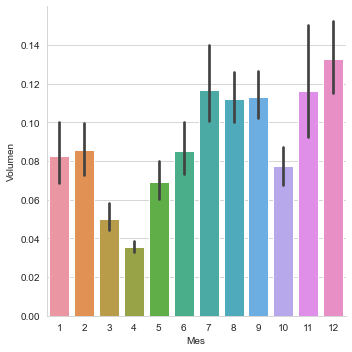

In [8]:
sns.catplot(x="Mes",y="Volumen",data=df_filt_3,kind="bar")
plt.xlabel("Mes")
plt.ylabel("Volumen")
plt.show()

### Es comun ver que el columen de ventas en general dismunuya en marzo , abril en colombia debido a que no se cuenta con fiestas
#Se observa una tendencia posivita entre los meses de mayo y septiembre("san juan y san pedro"). un leve bajon en octubre ("curioso por hallowenn")
# y un alsa de nuevo en noviembre y diciembre ( "Año nuevo")

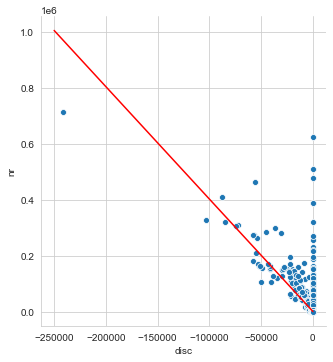

In [9]:
a,b = np.polyfit(df_filt_3["disc"],df_filt_3["nr"],1)
x = np.array([-250000,0])
y = a*x + b
sns.relplot(x="disc",y="nr",data=df_filt_3,kind="scatter")
plt.plot(x,y,color="r")
plt.show()

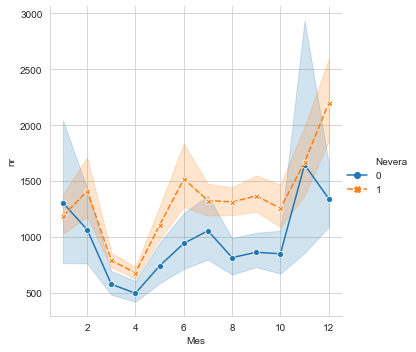

In [10]:
sns.relplot(x="Mes",y="nr",data = df_filt_3,kind="line",hue="Nevera",style="Nevera",markers=True)
plt.show()

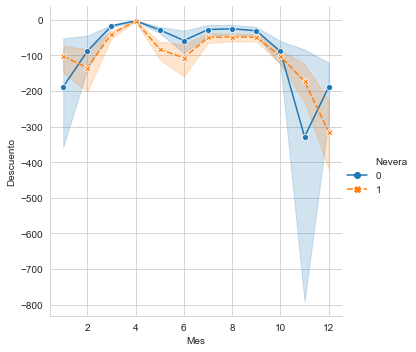

In [11]:
sns.relplot(x="Mes",y="disc",data = df_filt_3,kind="line",hue="Nevera",style="Nevera",markers=True)
plt.ylabel("Descuento")
plt.show()

<AxesSubplot:xlabel='Categoria', ylabel='Volumen de compra'>

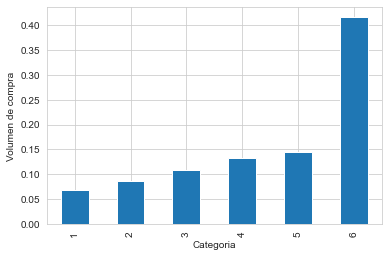

In [12]:
df_cat_vol = df_filt_3.groupby("Categoria")["Volumen"].mean().plot(kind="bar")
plt.ylabel("Volumen de compra")
display(df_cat_vol)

In [13]:
df_cat_marc = df_filt_3.groupby("Categoria")["Marca2"].value_counts()
display(df_cat_marc)

Categoria  Marca2
1          9          8274
           38         1543
           39         1543
           16          942
           20          890
2          9         21674
           38         3402
           39         3402
           16         3073
           20         2241
3          9         20320
           16         3706
           38         3068
           39         3068
           20         1815
4          9          3748
           16         1188
           38          566
           39          566
           20          218
5          9          2271
           16          690
           38          395
           39          395
           20          149
6          9           611
           16          176
           38          115
           39          115
           20           34
Name: Marca2, dtype: int64

Text(0, 0.5, 'Counts')

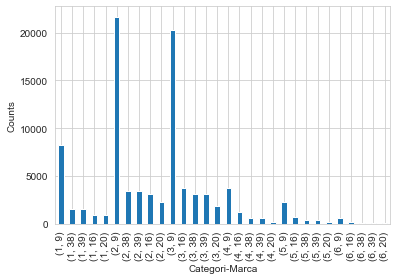

In [14]:
df_cat_marc.plot(kind="bar")
plt.xlabel("Categori-Marca")
plt.ylabel("Counts")

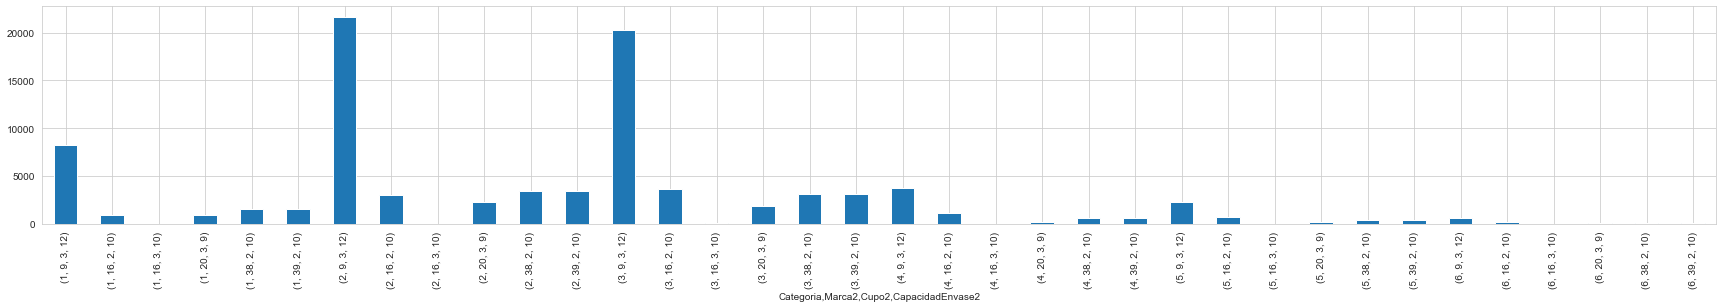

In [15]:
plt.figure(figsize=(30,4))
df_cat_marc_and = df_filt_3.groupby(["Categoria","Marca2","Cupo2","CapacidadEnvase2"])["Volumen"].count().plot(rot=90,kind="bar")
plt.show()

In [16]:
xys = df_filt_3.groupby(["Categoria","Marca2","Cupo2","CapacidadEnvase2"])["nr"].count()
xys = xys.to_frame()
display(xys)

nr
Categoria Marca2 Cupo2 CapacidadEnvase2       
1         9      3     12                 8274
          16     2     10                  938
                 3     10                    4
          20     3     9                   890
          38     2     10                 1543
          39     2     10                 1543
2         9      3     12                21674
          16     2     10                 3047
                 3     10                   26
          20     3     9                  2241
          38     2     10                 3402
          39     2     10                 3402
3         9      3     12                20320
          16     2     10                 3672
                 3     10                   34
          20     3     9                  1815
          38     2     10                 3068
          39     2     10                 3068
4         9      3     12                 3748
          16     2     10                 1173
                 3     10                   15
          20     3     9                   218
          38     2     10                  566
          39     2     10                  566
5         9      3     12                 2271
          16     2     10                  679
                 3     10                   11
          20     3     9                   149
          38     2     10                  395
          39     2     10                  395
6         9      3     12                  611
          16     2     10                  167
                 3     10                    9
          20     3     9                    34
          38     2     10                  115
          39     2     10                  115

In [30]:
#AGREGANDO MARCA 20 

df_marc_20 = df_filt_3.query("Marca2 == 20")
volumen_20 = df_marc_20.groupby("Cliente",as_index=False)["Volumen"].sum()
disc_20 = df_marc_20.groupby("Cliente",as_index=False)["disc"].sum()

#PARA MARCA 16

df_marc_16 = df_filt_3.query("Marca2 == 16")
volumen_16 = df_marc_16.groupby("Cliente",as_index=False)["Volumen"].sum()
disc_16 = df_marc_16.groupby("Cliente",as_index=False)["disc"].sum()

#PARA MARCA 9 

df_marc_9 = df_filt_3.query("Marca2 == 9")
volumen_9 = df_marc_9.groupby("Cliente",as_index=False)["Volumen"].sum()
disc_9 = df_marc_9.groupby("Cliente",as_index=False)["disc"].sum()

#PARA MARCA 38 

df_marc_38 = df_filt_3.query("Marca2 == 38")
volumen_38 = df_marc_38.groupby("Cliente",as_index=False)["Volumen"].sum()
disc_38 = df_marc_38.groupby("Cliente",as_index=False)["disc"].sum()

#PARA MARCA 39 

df_marc_39 = df_filt_3.query("Marca2 == 39")
volumen_39 = df_marc_39.groupby("Cliente",as_index=False)["Volumen"].sum()
disc_39 = df_marc_39.groupby("Cliente",as_index=False)["disc"].sum()

display(disc_39)

,Cliente,disc
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,6,0.0
...,...,...
5476,20529,0.0
5477,20567,0.0
5478,20569,0.0
5479,20577,0.0


In [31]:
df_new = pd.DataFrame()

In [32]:
df_new["Cliente"] = df_filt_3["Cliente"].unique()
df_new["Volumen_20"] = 0
df_new["disc_20"] = 0
df_new["Volumen_16"] = 0
df_new["disc_16"] = 0
df_new["Volumen_9"] = 0
df_new["disc_9"] = 0
df_new["Volumen_38"] = 0
df_new["disc_38"] = 0
df_new["Volumen_39"] = 0
df_new["disc_39"] = 0
display(df_new)

,Cliente,Volumen_20,disc_20,Volumen_16,disc_16,Volumen_9,disc_9,Volumen_38,disc_38,Volumen_39,disc_39
0,10,0,0,0,0,0,0,0,0,0,0
1,12,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0
4,18,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12388,20529,0,0,0,0,0,0,0,0,0,0
12389,20567,0,0,0,0,0,0,0,0,0,0
12390,20569,0,0,0,0,0,0,0,0,0,0
12391,20577,0,0,0,0,0,0,0,0,0,0


In [34]:

#AGREGANDO INFO DE MARCA 20

for cl in volumen_20["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["Volumen_20"] = volumen_20["Volumen"]
            
for cl in disc_20["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["disc_20"] = disc_20["disc"]        

#AGREGANDO INFO DE MARCA 16            
for cl in volumen_16["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["Volumen_16"] = volumen_16["Volumen"]
            
for cl in disc_16["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["disc_16"] = disc_16["disc"]
            
#AGREGANDO INFO DE MARCA 9           
for cl in volumen_9["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["Volumen_9"] = volumen_9["Volumen"]
            
for cl in disc_9["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["disc_9"] = disc_9["disc"]
            
#AGREGANDO INFO DE MARCA 38           
for cl in volumen_38["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["Volumen_38"] = volumen_38["Volumen"]
            
for cl in disc_38["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["disc_38"] = disc_38["disc"]
            
#AGREGANDO INFO DE MARCA 39           
for cl in volumen_39["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["Volumen_39"] = volumen_39["Volumen"]
            
for cl in disc_39["Cliente"]:
    for cl2 in df_new["Cliente"]:
        if cl == cl2:
            df_new["disc_39"] = disc_39["disc"]

            
df_new = df_new.fillna(0)
display(df_new)

,Cliente,Volumen_20,disc_20,Volumen_16,disc_16,Volumen_9,disc_9,Volumen_38,disc_38,Volumen_39,disc_39
0,10,0.084303,0.0,0.717235,-357.136871,0.037410,0.000000,0.156488,0.0,0.000000,0.0
1,12,0.252909,0.0,0.627400,-197.897527,0.018705,0.000000,0.117366,0.0,0.000000,0.0
2,14,0.118024,0.0,0.130406,-8.113074,0.280571,-430.710303,0.117366,0.0,0.000000,0.0
3,15,0.016861,0.0,0.021734,0.000000,0.140286,-67.981394,0.195610,0.0,0.000000,0.0
4,18,0.016861,0.0,0.108672,-21.082984,0.037410,-90.335910,0.019561,0.0,0.078244,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12388,20529,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
12389,20567,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
12390,20569,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
12391,20577,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
